### 최종 2021~2035 예측 및 시각화 
--- 

In [1]:
# 모듈 로딩
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')

import random
random.seed(42)


# 데이터 전처리
--- 

In [2]:
POWER_FIRE = pd.read_csv('../pred_POWER_FIRE.csv')
ELEC_ALL = pd.read_csv('../pred_ELEC_ALL.csv')

POWER_FIRE = POWER_FIRE['yhat']
ELEC_ALL = ELEC_ALL['yhat']

In [3]:
# 모델 학습할 데이터
train_feature = pd.read_csv('../data_tomato.csv')
train_target = pd.read_csv('../target.csv')
train_feature

# 자체 예측한 feature
future_feature = pd.read_csv('../data_future.csv')
future_feature

train_all =pd.concat([train_feature,train_target[['CIVIL','IND']]], axis =1)
train_all.info()


future_feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                300 non-null    object 
 1   TCL_AT              300 non-null    float64
 2   TCL_LT              300 non-null    float64
 3   TCL_HT              300 non-null    float64
 4   TEMP_EF_CAP         300 non-null    float64
 5   TEMP_EF_DONGNAM     300 non-null    float64
 6   TEMP_EF_DAEGYUNG    300 non-null    float64
 7   TEMP_EF_CHOONG      300 non-null    float64
 8   TEMP_EF_HONAM       300 non-null    float64
 9   TEMP_EF_MEAN        300 non-null    float64
 10  POWER_WATER         300 non-null    int64  
 11  POWER_FIRE          300 non-null    int64  
 12  POWER_NUCLEAR       300 non-null    int64  
 13  POWER_NAEYEON       300 non-null    int64  
 14  POWER_GROUP         300 non-null    int64  
 15  POWER_TRANS         300 non-null    int64  
 16  POWER_GA

,DATE,POWER_GAS,ELEC_IND_SUM,OIL_PRICE,QVA,TCL_LT,TEMP_EF,ELEC_SERVICE
0,2021-01-01,21004815,24009895,106.270957,122715.511387,-0.819359,3.720112,1.546123e+07
1,2021-02-01,19006411,22411095,106.452033,123791.588066,-0.488770,3.663880,1.485668e+07
2,2021-03-01,17216940,23047185,106.615613,123126.447539,0.108879,3.557796,1.291000e+07
3,2021-04-01,15290843,22640767,106.796638,123534.791822,0.929050,3.418933,1.228525e+07
4,2021-05-01,15763108,22310541,106.971887,123756.051487,1.691170,3.297840,1.092951e+07
...,...,...,...,...,...,...,...,...
175,2035-08-01,23623051,27327684,137.373064,144116.665066,3.940146,3.173664,1.651412e+07
176,2035-09-01,21558395,26481467,137.554127,145813.462779,2.922097,3.231943,1.524711e+07
177,2035-10-01,20954172,26795426,137.729350,145918.753203,1.620847,3.358512,1.358630e+07
178,2035-11-01,21861274,27345267,137.910414,146304.640846,0.430566,3.507064,1.477608e+07


In [4]:
# 자체 예측한 feature
future_feature = pd.read_csv('../data_future.csv')
future_feature = pd.concat([future_feature,POWER_FIRE,ELEC_ALL], axis=1)
future_feature.columns = ['DATE', 'POWER_GAS', 'ELEC_IND_SUM', 'OIL_PRICE', 'QVA', 'TCL_LT',
       'TEMP_EF', 'ELEC_SERVICE', 'POWER_FIRE', 'ELEC_ALL']
future_feature

,DATE,POWER_GAS,ELEC_IND_SUM,OIL_PRICE,QVA,TCL_LT,TEMP_EF,ELEC_SERVICE,POWER_FIRE,ELEC_ALL
0,2021-01-01,21004815,24009895,106.270957,122715.511387,-0.819359,3.720112,1.546123e+07,11984432,49065403
1,2021-02-01,19006411,22411095,106.452033,123791.588066,-0.488770,3.663880,1.485668e+07,10016106,46838260
2,2021-03-01,17216940,23047185,106.615613,123126.447539,0.108879,3.557796,1.291000e+07,11379175,43744720
3,2021-04-01,15290843,22640767,106.796638,123534.791822,0.929050,3.418933,1.228525e+07,9588955,42509561
4,2021-05-01,15763108,22310541,106.971887,123756.051487,1.691170,3.297840,1.092951e+07,8879315,40265856
...,...,...,...,...,...,...,...,...,...,...
175,2035-08-01,23623051,27327684,137.373064,144116.665066,3.940146,3.173664,1.651412e+07,14316637,60281687
176,2035-09-01,21558395,26481467,137.554127,145813.462779,2.922097,3.231943,1.524711e+07,12565225,57078253
177,2035-10-01,20954172,26795426,137.729350,145918.753203,1.620847,3.358512,1.358630e+07,13568001,54776519
178,2035-11-01,21861274,27345267,137.910414,146304.640846,0.430566,3.507064,1.477608e+07,15354540,56697266


In [5]:
# 1996~2020
train_all = train_all[['DATE','POWER_GAS','ELEC_INDSUM','OIL_PRICE','QVA','TCL_LT','TEMP_EF_MEAN','ELEC_SERVICE','POWER_FIRE','ELEC_ALL', 'CIVIL','IND']]

# 1996~2020 feature
train_data = train_all.drop(['DATE','CIVIL','IND'], axis =1)

# 1996~2020 target
train_target = train_all[['CIVIL','IND']]
train_target_C = train_all['CIVIL']
train_target_I = train_all['IND']

# 2021~2035
test_data = future_feature.drop(['DATE'], axis =1)
test_data.columns = ['POWER_GAS','ELEC_INDSUM','OIL_PRICE','QVA','TCL_LT','TEMP_EF_MEAN','ELEC_SERVICE','POWER_FIRE','ELEC_ALL']

# 1996~2035
feature_all = pd.concat([train_data,test_data])
feature_all = feature_all.reset_index(drop = True) 
feature_all

,POWER_GAS,ELEC_INDSUM,OIL_PRICE,QVA,TCL_LT,TEMP_EF_MEAN,ELEC_SERVICE,POWER_FIRE,ELEC_ALL
0,8408979,9236808,27.860000,36550.300000,-0.189311,3.744768,3.616542e+06,2119473,16224867
1,7593086,8465308,29.040000,36751.000000,-0.226982,3.732234,3.551611e+06,1875589,15363840
2,8306941,9677322,27.990000,36951.700000,-0.045631,3.621268,3.333225e+06,1923728,16094268
3,8299351,9650845,28.740000,37152.400000,0.029456,3.460496,3.430624e+06,1747174,16266027
4,8156027,9658045,29.180000,37365.733333,0.242892,3.305460,3.333483e+06,2092955,16028072
...,...,...,...,...,...,...,...,...,...
475,23623051,27327684,137.373064,144116.665066,3.940146,3.173664,1.651412e+07,14316637,60281687
476,21558395,26481467,137.554127,145813.462779,2.922097,3.231943,1.524711e+07,12565225,57078253
477,20954172,26795426,137.729350,145918.753203,1.620847,3.358512,1.358630e+07,13568001,54776519
478,21861274,27345267,137.910414,146304.640846,0.430566,3.507064,1.477608e+07,15354540,56697266


In [6]:
# 과거 데이터 학습 함수(target 존재시)
def make_dataset1(data, label, window_size=18):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size): # 데이터 개월 개수 - 학습할 과거개월수 
        feature_list.append(np.array(data.iloc[i:i+window_size])) # 시작 개월 ~ 12개월
        label_list.append(np.array(label.iloc[i+window_size])) # 12개월 후 타겟 데이터
    return np.array(feature_list), np.array(label_list)

# 과거 데이터 학습 함수(target 존재하지 않을 시)
# 최종 test용
def make_dataset3(data, window_size=18):
    test_list = []
    for i in range(len(data)-window_size): # 데이터 개월 수 
        test_list.append(np.array(data.iloc[i:i+window_size])) # 시작 개월 ~ 12개월 # 12개월 후 타겟 데이터
    return np.array(test_list)

# 1. 산업용(IND) 예측
---

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_target = MinMaxScaler()
# 전체
scale_cols = ['POWER_GAS','ELEC_INDSUM','OIL_PRICE','QVA','TCL_LT','TEMP_EF_MEAN','ELEC_SERVICE','POWER_FIRE','ELEC_ALL']
# 산업용
# scale_cols = ['POWER_GAS','ELEC_INDSUM','OIL_PRICE','QVA','TEMP_EF_MEAN','ELEC_SERVICE','POWER_FIRE','ELEC_ALL']

# 스케일링
train_data_scaled = scaler.fit_transform(train_data[scale_cols])
feature_all_scaled = scaler.fit_transform(feature_all[scale_cols])

train_target_scaled = scaler_target.fit_transform(train_target)

# 데이터프레임으로 변환
train_data_scaled = pd.DataFrame(train_data_scaled)
feature_all_scaled = pd.DataFrame(feature_all_scaled)
train_target_scaled = pd.DataFrame(train_target_scaled)

# 데이터프레임 컬럼명 생성
train_data_scaled.columns = scale_cols
feature_all_scaled.columns = scale_cols

train_target_scaled.columns = ['CIVIL','IND']
train_target_scaled_C = train_target_scaled['CIVIL']
train_target_scaled_I = train_target_scaled['IND']

In [8]:
feature_all_scaled.shape

(480, 9)

In [9]:
# [ 최종 전용 (학습 300개월, 예측 180개월) ] 

# 과거 학습단위 설정 (단위: 과거 직전 개월 수 -> 다음 1개월 예측 )
WINDOW_SIZE = 14

# 학습 데이터
x_train = train_data_scaled #1996~2020
# target 산업용(스케일 X)
y_train_I = train_target_I # 1996~2020

# 최종테스트용 x_test
x_test_final = feature_all_scaled[300 - WINDOW_SIZE:]


x_train.shape, y_train_I.shape, x_test_final.shape

((300, 9), (300,), (194, 9))

In [10]:
# train, valid, test 과거학습 단위 생성

# 산업용
x_train, y_train_I = make_dataset1(x_train, y_train_I, WINDOW_SIZE)

# test용 (2021~2035년)
x_test_final = make_dataset3(x_test_final, WINDOW_SIZE)

In [11]:
print('[ 1996~2015 train/target 데이터 ]')
print(f'x_train.shape: {x_train.shape}, y_train_I.shape: {y_train_I.shape}') 
print()
print('[ 2021~2035 train 데이터 ]')
print(f'x_test_final.shape : {x_test_final.shape}')
print() 

[ 1996~2015 train/target 데이터 ]
x_train.shape: (286, 14, 9), y_train_I.shape: (286,)

[ 2021~2035 train 데이터 ]
x_test_final.shape : (180, 14, 9)



In [32]:
# create LSTM model-------------------------------------------------------------------
from random import shuffle
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM,Bidirectional

model_I = Sequential()
model_I.add((LSTM(64,
                input_shape=(x_train.shape[1], x_train.shape[2]), 
                activation='relu', 
                return_sequences=False)
            ))
model_I.add(Dense(32, activation='relu'))
model_I.add(Dense(16, activation='relu'))
model_I.add(Dense(1))

# LSTM model compile-------------------------------------------------------------------

model_I.compile(loss='mape', optimizer='adam')

history = model_I.fit(x_train, y_train_I, 
                                    epochs=120, 
                                    batch_size=16)


Epoch 1/120
18/18 [==============================] - 1s 3ms/step - loss: 99.9999
Epoch 2/120
18/18 [==============================] - 0s 3ms/step - loss: 99.9993
Epoch 3/120
18/18 [==============================] - 0s 4ms/step - loss: 98.6077
Epoch 4/120
18/18 [==============================] - 0s 3ms/step - loss: 53.1400
Epoch 5/120
18/18 [==============================] - 0s 3ms/step - loss: 30.2439
Epoch 6/120
18/18 [==============================] - 0s 4ms/step - loss: 18.8980
Epoch 7/120
18/18 [==============================] - 0s 3ms/step - loss: 16.9683
Epoch 8/120
18/18 [==============================] - 0s 3ms/step - loss: 18.4351
Epoch 9/120
18/18 [==============================] - 0s 4ms/step - loss: 17.3772
Epoch 10/120
18/18 [==============================] - 0s 4ms/step - loss: 16.7734
Epoch 11/120
18/18 [==============================] - 0s 4ms/step - loss: 16.2465
Epoch 12/120
18/18 [==============================] - 0s 4ms/step - loss: 16.2304
Epoch 13/120
18/18 [=====

In [33]:
pred_final_IND = model_I.predict(x_test_final)
pred_final_IND.shape

6/6 [==============================] - 0s 2ms/step


(180, 1)

In [34]:
pred_final_IND

array([[690278.8 ],
       [619455.8 ],
       [551213.06],
       [465834.56],
       [415961.7 ],
       [408583.4 ],
       [421689.88],
       [448423.66],
       [483041.53],
       [520628.2 ],
       [564930.8 ],
       [599812.94],
       [624053.1 ],
       [608286.2 ],
       [605332.7 ],
       [541117.7 ],
       [486339.7 ],
       [469358.78],
       [463411.12],
       [475514.75],
       [512672.94],
       [569299.2 ],
       [637734.3 ],
       [687693.1 ],
       [693639.25],
       [647580.44],
       [604058.9 ],
       [547734.4 ],
       [501385.78],
       [477874.03],
       [473037.4 ],
       [482220.66],
       [520854.94],
       [574361.2 ],
       [642693.06],
       [695749.3 ],
       [695714.75],
       [647737.56],
       [602920.25],
       [555740.75],
       [525209.3 ],
       [500765.4 ],
       [493027.38],
       [502576.75],
       [542049.56],
       [594523.25],
       [660210.1 ],
       [717085.9 ],
       [709865.8 ],
       [660339.94],


In [36]:
pred_final_IND.shape

(180, 1)

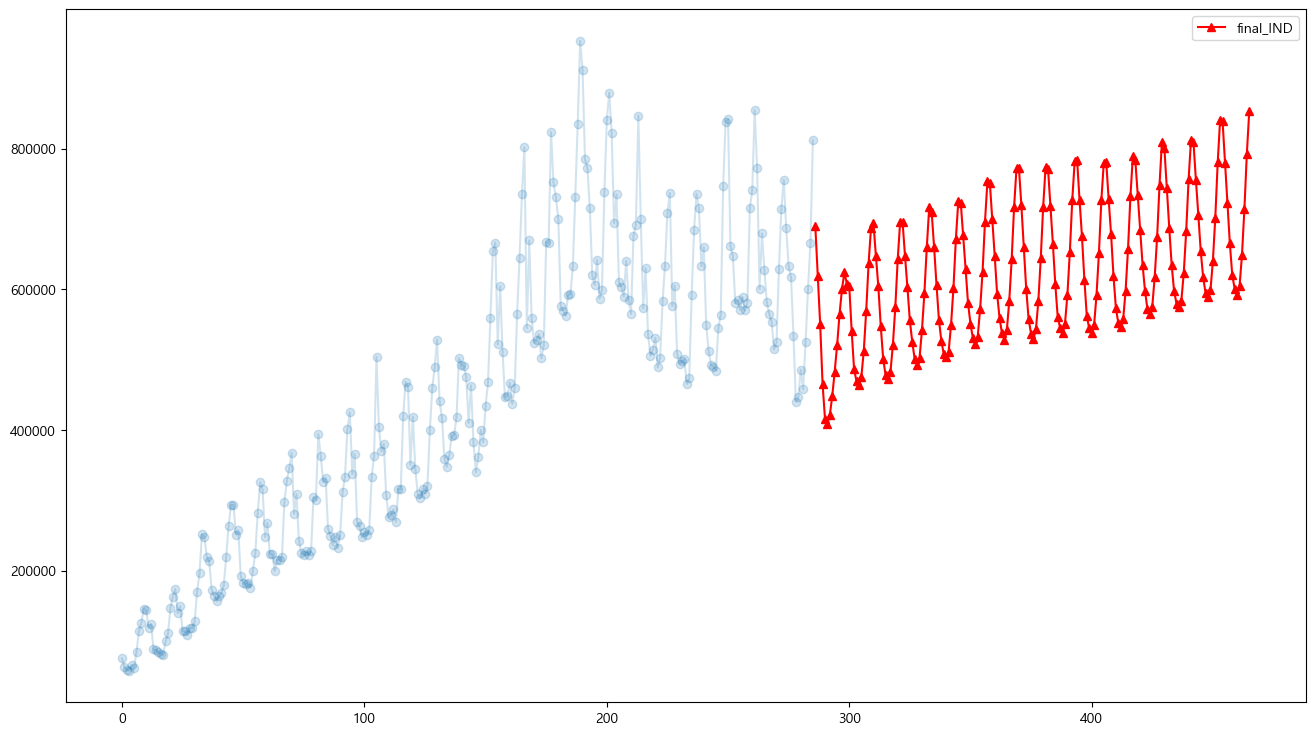

In [37]:
# [ 예측 결과 시각화: 전체흐름 파악용 ]
a_axis = np.arange(0, len(y_train_I))
b_axis = np.arange(len(y_train_I), len(y_train_I) + len(pred_final_IND))

plt.figure(figsize=(16,9)) # .reshape(x_train.shape[0],) 
plt.plot(a_axis, y_train_I, 'o-',alpha=0.2) 
# plt.plot(b_axis, pred_I, 'o-', color='blue', label='Predicted')
# plt.plot(b_axis, y_val_I, 'o-', color='green', alpha=0.2, label='Actual')
plt.plot(b_axis, pred_final_IND, '^-', color='red', label='final_IND')
plt.legend()
plt.show()

# 2. 민수용(CIVIL) 예측
---

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_target = MinMaxScaler()
# 전체
scale_cols = ['POWER_GAS','ELEC_INDSUM','OIL_PRICE','QVA','TCL_LT','TEMP_EF_MEAN','ELEC_SERVICE','POWER_FIRE','ELEC_ALL']
# 민수용
# scale_cols = ['POWER_GAS','ELEC_INDSUM','OIL_PRICE','QVA','TEMP_EF_MEAN']

# 스케일링
train_data_scaled = scaler.fit_transform(train_data[scale_cols])
feature_all_scaled = scaler.fit_transform(feature_all[scale_cols])

train_target_scaled = scaler_target.fit_transform(train_target)

# 데이터프레임으로 변환
train_data_scaled = pd.DataFrame(train_data_scaled)
feature_all_scaled = pd.DataFrame(feature_all_scaled)
train_target_scaled = pd.DataFrame(train_target_scaled)

# 데이터프레임 컬럼명 생성
train_data_scaled.columns = scale_cols
feature_all_scaled.columns = scale_cols

train_target_scaled.columns = ['CIVIL','IND']
train_target_scaled_C = train_target_scaled['CIVIL']
train_target_scaled_I = train_target_scaled['IND']

In [18]:
# [ 최종 전용 (학습 300개월, 예측 180개월) ] 

# 과거 학습 단위 설정
WINDOW_SIZE = 18  # 단위:직전 개월 수 -> 다음 1개월 예측

# 학습 데이터
x_train = train_data_scaled #1996~2020
# target 산업용(스케일 X)
y_train_C = train_target_C # 1996~2020
# x_test(최종테스트용)
x_test_final = feature_all_scaled[300-WINDOW_SIZE:] # 과거단위 학습으로 WINDOW_SIZE만큼 이전 데이터 필요


WINDOW_SIZE, x_train.shape, y_train_C.shape, x_test_final.shape

(14, (300, 9), (300,), (194, 9))

In [19]:
# train, valid, test 과거학습 단위 생성

##########   과거학습 함수 실행   ##################### 
# 산업용
x_train, y_train_C = make_dataset1(x_train, y_train_C, WINDOW_SIZE)
# test용 (2021~2035년)
x_test_final = make_dataset3(x_test_final, WINDOW_SIZE)

# shape check
print('[ 1996~2015 train/target 데이터 ]')
print(f'x_train.shape: {x_train.shape}, y_train_I.shape: {y_train_C.shape}') 
print()
print('[ 2021~2035 train 데이터 ]')
print(f'x_test_final.shape : {x_test_final.shape}')
print() 

[ 1996~2015 train/target 데이터 ]
x_train.shape: (286, 14, 9), y_train_I.shape: (286,)

[ 2021~2035 train 데이터 ]
x_test_final.shape : (180, 14, 9)



In [21]:
# create LSTM model-------------------------------------------------------------------
from random import shuffle
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model_C = Sequential()
model_C.add((LSTM(64, 
                input_shape=(x_train.shape[1], x_train.shape[2]), 
                activation='relu', 
                return_sequences=False)
            ))

model_C.add(Dense(1))

# LSTM model compile-------------------------------------------------------------------

model_C.compile(loss='mape', optimizer='adam')

history = model_C.fit(x_train, y_train_C, 
                                    epochs=120, 
                                    batch_size=16)


Epoch 1/200
18/18 [==============================] - 1s 4ms/step - loss: 100.0000
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 99.9997
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 99.7506
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 77.9126
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 57.8868
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 57.1067
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 46.2819
Epoch 8/200
18/18 [==============================] - 0s 5ms/step - loss: 40.0139
Epoch 9/200
18/18 [==============================] - 0s 5ms/step - loss: 36.3745
Epoch 10/200
18/18 [==============================] - 0s 4ms/step - loss: 32.2891
Epoch 11/200
18/18 [==============================] - 0s 4ms/step - loss: 29.5214
Epoch 12/200
18/18 [==============================] - 0s 4ms/step - loss: 31.1905
Epoch 13/200
18/18 [====

In [22]:
# 예측 #
pred_final_CIVIL = model_C.predict(x_test_final)
pred_final_CIVIL.shape

6/6 [==============================] - 0s 2ms/step


(180, 1)

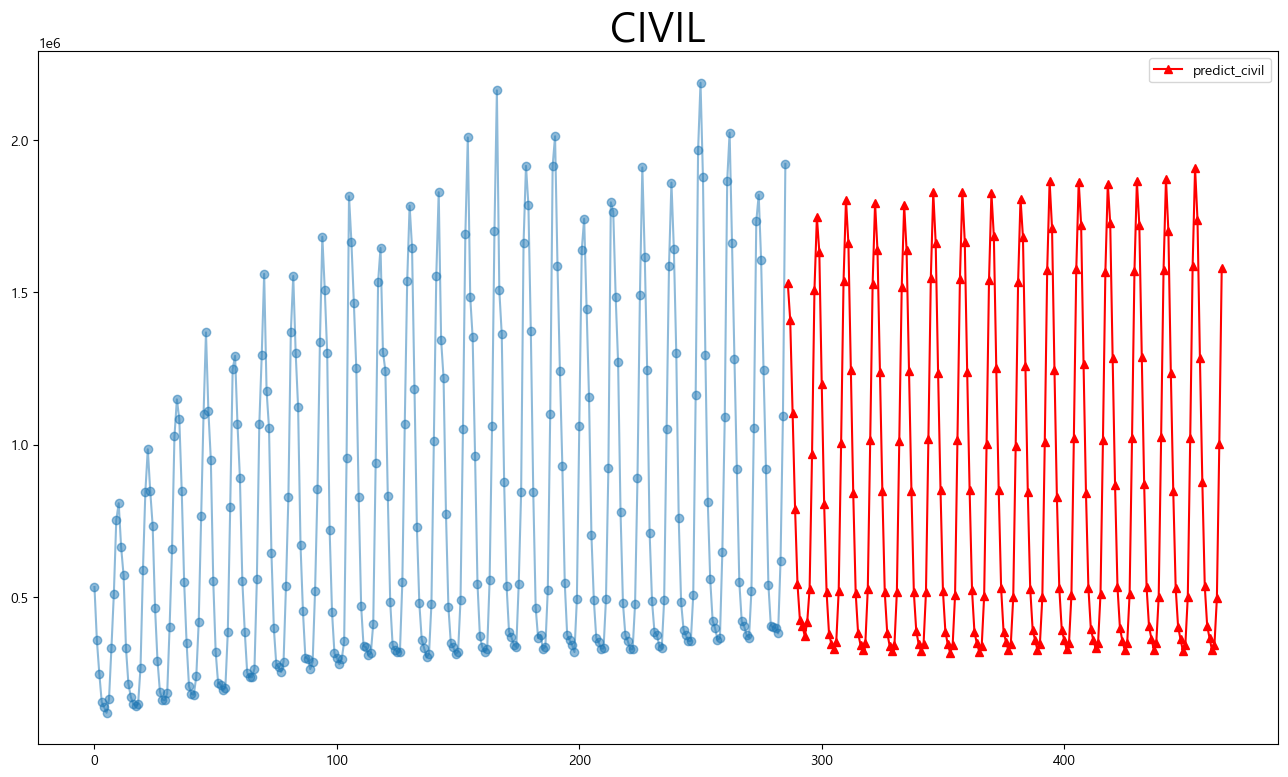

In [23]:
# [ 예측 결과 시각화: 전체흐름 파악용 ]

# x축 범위 설정(a_axis: 학습데이터, y_axis: 예측 데이터)
a_axis = np.arange(0, len(y_train_C))
b_axis = np.arange(len(y_train_C), len(y_train_C) + len(pred_final_CIVIL))

plt.figure(figsize=(16,9))
plt.title('CIVIL',fontsize=30)
plt.plot(a_axis, y_train_C, 'o-',alpha=0.5) 
plt.plot(b_axis, pred_final_CIVIL, '^-', color='red', label='predict_civil')
plt.legend()
plt.show()

In [24]:
pred_final_CIVIL.shape, pred_final_IND.shape

((180, 1), (180, 14, 1))

In [25]:
# 모델 저장
# model_C.save_weight('model_weight(민수용)')
# model_I.save_weight('model_weight(산업용)')